In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | uspenskaya
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | isangel
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | madras
Processing Record 13 of Set 1 | tarudant
City not found. Skipping...
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | grindavik
Processing Record 20 of Set 1 | sur
Processing Record 21 of Set 1 | kenai
Processing Record 22 of Set 1 | sorvag

Processing Record 38 of Set 4 | saint-georges
Processing Record 39 of Set 4 | rawah
Processing Record 40 of Set 4 | kencong
Processing Record 41 of Set 4 | barsovo
Processing Record 42 of Set 4 | grand centre
City not found. Skipping...
Processing Record 43 of Set 4 | kutum
Processing Record 44 of Set 4 | burlatskoye
Processing Record 45 of Set 4 | bubaque
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 48 of Set 4 | palafrugell
Processing Record 49 of Set 4 | port pirie
Processing Record 50 of Set 4 | narsaq
Processing Record 1 of Set 5 | kysyl-syr
Processing Record 2 of Set 5 | vao
Processing Record 3 of Set 5 | kirkuk
Processing Record 4 of Set 5 | kropotkin
Processing Record 5 of Set 5 | touros
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | bereda
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | borogontsy
Processing Record 10 of Set 5 | westport
Processin

Processing Record 25 of Set 8 | natitingou
Processing Record 26 of Set 8 | katsuura
Processing Record 27 of Set 8 | geraldton
Processing Record 28 of Set 8 | karratha
Processing Record 29 of Set 8 | khandyga
Processing Record 30 of Set 8 | tupi paulista
Processing Record 31 of Set 8 | genoa
Processing Record 32 of Set 8 | kazbegi
City not found. Skipping...
Processing Record 33 of Set 8 | walvis bay
Processing Record 34 of Set 8 | oudtshoorn
Processing Record 35 of Set 8 | coahuayana
Processing Record 36 of Set 8 | luanda
Processing Record 37 of Set 8 | lahaina
Processing Record 38 of Set 8 | henties bay
Processing Record 39 of Set 8 | dobryatino
Processing Record 40 of Set 8 | roxas
Processing Record 41 of Set 8 | bronnoysund
Processing Record 42 of Set 8 | elk plain
Processing Record 43 of Set 8 | sechura
Processing Record 44 of Set 8 | bend
Processing Record 45 of Set 8 | puqi
Processing Record 46 of Set 8 | aquiraz
Processing Record 47 of Set 8 | kandi
Processing Record 48 of Set 8

Processing Record 9 of Set 12 | zubtsov
Processing Record 10 of Set 12 | monterey
Processing Record 11 of Set 12 | marsh harbour
Processing Record 12 of Set 12 | hervey bay
Processing Record 13 of Set 12 | carballo
Processing Record 14 of Set 12 | raudeberg
Processing Record 15 of Set 12 | lata
Processing Record 16 of Set 12 | harbin
Processing Record 17 of Set 12 | tukrah
Processing Record 18 of Set 12 | xining
Processing Record 19 of Set 12 | tomatlan
Processing Record 20 of Set 12 | buala
Processing Record 21 of Set 12 | dudinka
Processing Record 22 of Set 12 | luganville
Processing Record 23 of Set 12 | pervomayskoye
Processing Record 24 of Set 12 | lagos
Processing Record 25 of Set 12 | del rio
Processing Record 26 of Set 12 | ganzhou
Processing Record 27 of Set 12 | south hill
Processing Record 28 of Set 12 | bandarbeyla
Processing Record 29 of Set 12 | funtua
Processing Record 30 of Set 12 | avera
Processing Record 31 of Set 12 | mildura
Processing Record 32 of Set 12 | babu
Pro

In [7]:
len(city_data)

534

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.97,-42.03,73.40,69,75,12.75,BR,2020-11-01 19:45:49
1,Uspenskaya,45.76,41.07,56.25,85,100,11.32,RU,2020-11-01 19:46:34
2,Saskylakh,71.92,114.08,-9.26,88,99,10.67,RU,2020-11-01 19:46:34
3,Pisco,-13.70,-76.22,66.20,77,90,9.17,PE,2020-11-01 19:44:18
4,Punta Arenas,-53.15,-70.92,51.80,76,75,17.22,CL,2020-11-01 19:46:34
5,Isangel,-19.55,169.27,77.40,77,10,14.88,VU,2020-11-01 19:46:34
6,Albany,42.60,-73.97,48.99,84,100,1.99,US,2020-11-01 19:46:34
7,Mataura,-46.19,168.86,48.99,87,66,8.99,NZ,2020-11-01 19:46:34
8,Upernavik,72.79,-56.15,16.34,93,96,4.03,GL,2020-11-01 19:46:34
9,Lebu,-37.62,-73.65,57.83,79,7,5.35,CL,2020-11-01 19:46:20


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2020-11-01 19:45:49,-22.97,-42.03,73.40,69,75,12.75
1,Uspenskaya,RU,2020-11-01 19:46:34,45.76,41.07,56.25,85,100,11.32
2,Saskylakh,RU,2020-11-01 19:46:34,71.92,114.08,-9.26,88,99,10.67
3,Pisco,PE,2020-11-01 19:44:18,-13.70,-76.22,66.20,77,90,9.17
4,Punta Arenas,CL,2020-11-01 19:46:34,-53.15,-70.92,51.80,76,75,17.22
...,...,...,...,...,...,...,...,...,...
529,Grand Gaube,MU,2020-11-01 19:47:43,-20.01,57.66,66.99,69,40,1.99
530,Providencia,MX,2020-11-01 19:47:43,28.72,-111.58,93.00,27,0,1.99
531,Visby,SE,2020-11-01 19:47:43,57.64,18.30,51.01,100,90,13.87
532,Tombouctou,ML,2020-11-01 19:47:44,20.00,-3.00,88.14,13,100,4.41


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/01/20'

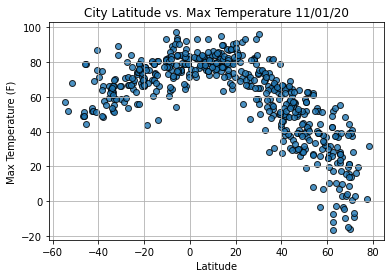

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

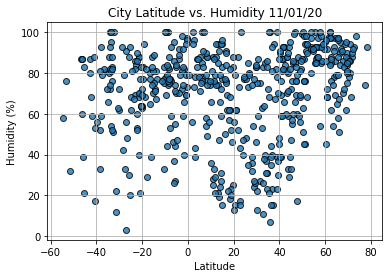

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

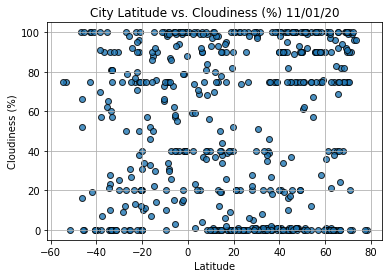

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

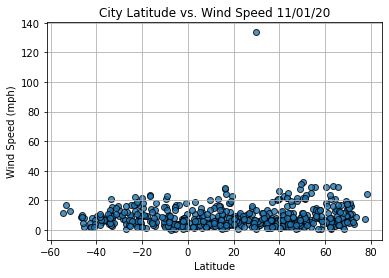

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [18]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2020-11-01 19:43:14
Lat                        -33.93
Lng                         18.42
Max Temp                     66.2
Humidity                       72
Cloudiness                      0
Wind Speed                  11.41
Name: 13, dtype: object

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

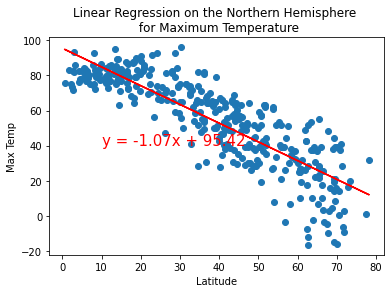

-0.8557951731715228


In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

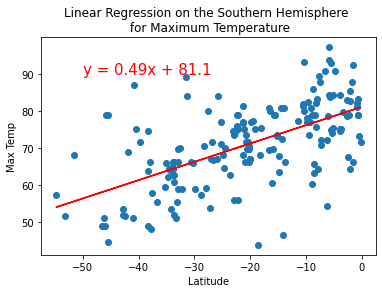

0.6035126491374265


In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

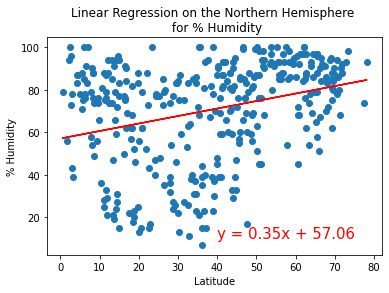

0.30261740672395393


In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

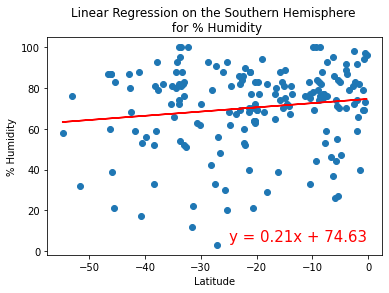

0.13988144377148454


In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,5))

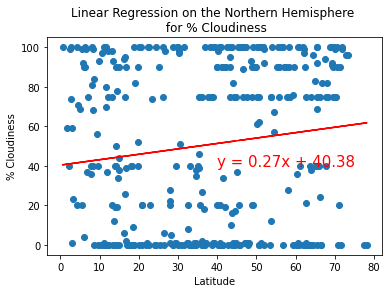

0.13602662983218358


In [41]:
# Skill Drill 6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,40))

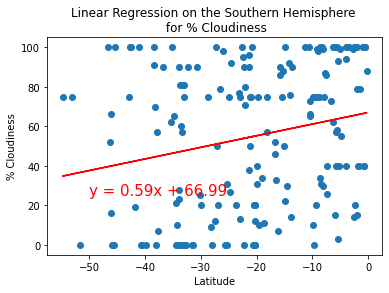

0.22072588583632616


In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,25))

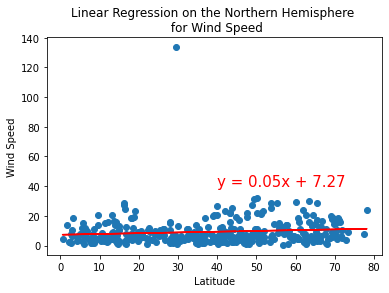

0.11234641937760351


In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,40))

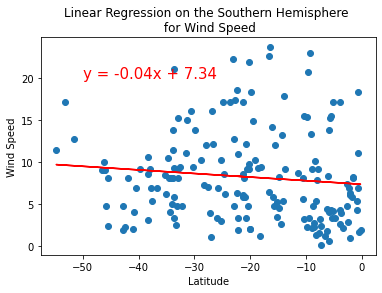

-0.1090196283923954


In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))